# Ejemplo 5.4: Evaluación, Comparación y Selección de Modelos con Random Forest y Optimización

Descripción:
En este ejercicio, se entrenará un modelo de Random Forest sin optimización de hiperparámetros
y otro con optimización mediante GridSearchCV. Además, se analizarán las curvas de aprendizaje,
se compararán los resultados del modelo antes y después de la optimización, y se evaluará la
importancia de las características.


In [1]:
# Paso 1: Importar librerías necesarias
# -------------------------------------------
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# Paso 2: Cargar el conjunto de datos Iris
# -------------------------------------------
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
# Paso 3: Dividir los datos en conjunto de entrenamiento y prueba
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 4: Entrenar un modelo de Random Forest sin optimización de hiperparámetros
# -------------------------------------------
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
# Evaluar el modelo sin optimización
y_pred = rf_model.predict(X_test)
accuracy_no_optimization = accuracy_score(y_test, y_pred)

print("Precisión sin optimización de hiperparámetros:", accuracy_no_optimization)


Precisión sin optimización de hiperparámetros: 1.0


In [3]:
# Paso 5: Optimizar el modelo de Random Forest usando GridSearchCV
# -------------------------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Evaluar el modelo optimizado
best_rf_model = grid_search.best_estimator_
y_pred_optimized = best_rf_model.predict(X_test)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

print("Precisión con optimización de hiperparámetros:", accuracy_optimized)
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)


Precisión con optimización de hiperparámetros: 1.0
Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [4]:
# Paso 6: Comparar los resultados del modelo sin optimización vs con optimización
# -------------------------------------------
print("\nComparación de resultados:")
print(f"Precisión sin optimización: {accuracy_no_optimization:.4f}")
print(f"Precisión con optimización: {accuracy_optimized:.4f}")



Comparación de resultados:
Precisión sin optimización: 1.0000
Precisión con optimización: 1.0000


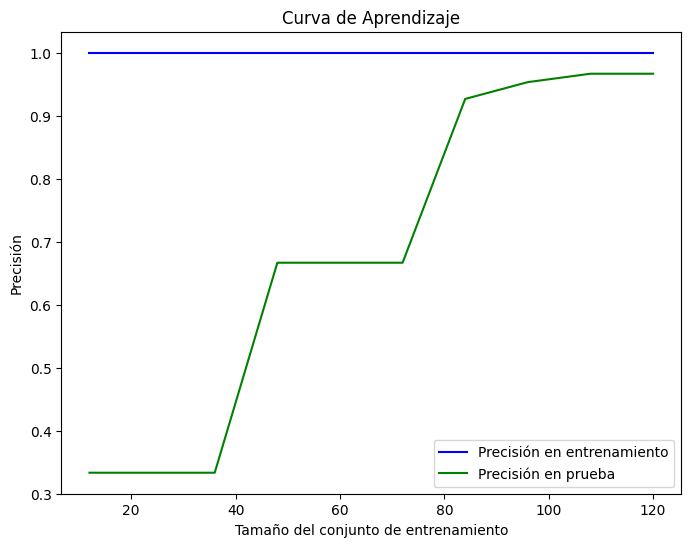

In [5]:

# Paso 7: Analizar las curvas de aprendizaje
# -------------------------------------------
train_sizes, train_scores, test_scores = learning_curve(
    best_rf_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Promedio de puntuaciones para entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Precisión en entrenamiento", color="blue")
plt.plot(train_sizes, test_mean, label="Precisión en prueba", color="green")
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend()
plt.show()

In [6]:
# Paso 8: Evaluar la importancia de las características
# -------------------------------------------
importances = best_rf_model.feature_importances_
features = iris.feature_names

# Mostrar la importancia de cada característica
feature_importance_df = pd.DataFrame({
    'Característica': features,
    'Importancia': importances
})

# Ordenar por la importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)
print("\nImportancia de las características:")
print(feature_importance_df)



Importancia de las características:
      Característica  Importancia
3   petal width (cm)     0.433982
2  petal length (cm)     0.417308
0  sepal length (cm)     0.104105
1   sepal width (cm)     0.044605


In [7]:
# Paso 9: Evaluar el sesgo y la varianza
# -------------------------------------------
# Si el modelo tiene un alto rendimiento en los datos de entrenamiento pero no en los de prueba,
# es posible que haya sobreajuste (alta varianza). Si el rendimiento es bajo en ambos, puede ser
# que el modelo esté subajustado (alto sesgo).
print("\nEvaluación de sesgo y varianza:")
print(f"Precisión en entrenamiento: {train_mean[-1]:.4f}")
print(f"Precisión en prueba: {test_mean[-1]:.4f}")


Evaluación de sesgo y varianza:
Precisión en entrenamiento: 1.0000
Precisión en prueba: 0.9667
